In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import sklearn.preprocessing as prepro
from matplotlib import gridspec

In [ ]:
WIDTH = 227
HEIGHT = 227
nSamples = 189
sampleSize = 3*WIDTH*HEIGHT
path = "C:\\Users\\info\\Documents\\Polito\\MSc\\ML-AI\\HW1\\"
labels = ["dog", "guitar", "house","person"]
label_color = {'dog': 'red', 'guitar': 'green', 'house': 'blue', 'person': 'magenta'}

In [0]:
def importImages():
        i = 0
        j = 0
        y = []
        tmp = []
        for dir in os.listdir(path):
                localPath = "{}\\{}".format(path, dir)
                if os.path.isdir(localPath):
                        for file in os.listdir(localPath):
                                if file.endswith(".jpg"):
                                        location = "{}\\{}".format(localPath, file)
                                        img_data = np.asarray(Image.open(location))
                                        tmp.append(img_data.ravel())
                                        y.append(j)
                                        i = i + 1
                        j = j + 1
        return np.array(tmp), y

def showColorClasses(input_matrix):
        cvec = []
        plt.subplots_adjust(hspace = 0.4, wspace = 1)
        scaled = prepro.StandardScaler().fit_transform(input_matrix)
        x_t = PCA(2).fit_transform(scaled)
        cvec = [label_color[labels[k]] for k in y]

        plt.subplot(1, 3, 1)
        plt.scatter(x_t[:,0],x_t[:,1],c=cvec)
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        
        pca_tot = PCA()
        pca_tot = pca_tot.fit(scaled)
        components3_4 = pca_tot.components_[3:5]
        components10_11 = pca_tot.components_[10:12]

        pca_tot.components_ = components3_4
        x_3_4 = pca_tot.transform(scaled)
        plt.subplot(1, 3, 2)
        plt.scatter(x_3_4[:,0],x_3_4[:,1],c=cvec)
        plt.xlabel("PC3")
        plt.ylabel("PC4")

        pca_tot.components_ = components10_11
        x_10_11 = pca_tot.transform(scaled)
        plt.subplot(1, 3, 3)
        plt.scatter(x_10_11[:,0],x_10_11[:,1],c=cvec)
        plt.xlabel("PC10")
        plt.ylabel("PC11")
        
        plt.show()
        
def showImageWithPca(n_pca, input_matrix, nImg, show):
        pca_x = PCA(n_pca)
        projected = pca_x.fit_transform(input_matrix)
        x_inv = pca_x.inverse_transform(projected)
        # print variance ratio
        val = np.sum(pca_last_n.explained_variance_ratio_)
        print("Variance covered with this PCA: {}".format(val))
        if (show):
                fig = plt.figure()
                fig.add_subplot(1,2,1)
                plt.imshow(np.reshape(input_matrix[nImg,:]/255.0,(227,227,3)))
                fig.add_subplot(1,2,2)
                plt.imshow(np.reshape(x_inv[nImg,:]/255.0,(227,227,3)))
                plt.show()
        else:
                return x_inv[nImg,:]

def showImageWithPcaLast(n_pca, input_matrix, nImg, show):
        # PCA last N computation
        pca_last_n = PCA()
        pca_last_n = pca_last_n.fit(input_matrix)
        components = pca_last_n.components_[-n_pca:]
        pca_last_n.components_ = components
        x_last_n = pca_last_n.transform(input_matrix)
        x_inv_last_n = pca_last_n.inverse_transform(x_last_n)
        # print variance ratio
        val = np.sum(pca_last_n.explained_variance_ratio_)
        print("Variance covered with this PCA: {}".format(val))
        if(show):
                fig_last_n = plt.figure()
                fig_last_n.add_subplot(1,2,1)
                plt.imshow(np.reshape(input_matrix[nImg,:]/255.0,(227,227,3)))
                fig_last_n.add_subplot(1,2,2)
                plt.imshow(np.reshape(x_inv_last_n[nImg,:]/255.0, (227,227,3)))
                plt.show()
        else:
                return x_inv_last_n[nImg,:]

def showVarCovederageRateoWithPCA(n_pca, input_matrix):
        # number of components over variance coverage
        if n_pca>=0:
                pca_x = PCA(n_pca).fit(input_matrix)
        else:
                pca_x = PCA().fit(input_matrix)
        plt.plot(np.cumsum(pca_x.explained_variance_ratio_)) 
        plt.xlabel('Number of Components') 
        plt.ylabel('Variance retained') 
        plt.ylim(0,1) 
        plt.show()

def naiveBayesClassifier(input_matrix, classes, firstPC=0, lastPC=0):
        scaled = prepro.StandardScaler().fit_transform(input_matrix)
        if firstPC == 0 and lastPC == 0:
                x_train, x_test, y_train, y_test = train_test_split(scaled, classes, test_size=0.1)
        else:
                # Select only PCA in range
                pca_tot = PCA()
                pca_tot = pca_tot.fit(scaled)
                twoComponents = pca_tot.components_[firstPC:lastPC]
                pca_tot.components_ = twoComponents
                x = pca_tot.transform(scaled)   
                # Train and use the model
                x_train, x_test, y_train, y_test = train_test_split(x, classes, test_size=0.1)
        clf = GaussianNB()
        clf.fit(x_train,y_train)
        prediction = clf.predict(x_test)
        accuracy = accuracy_score(y_test,prediction)
        print(accuracy)

def plotClfBoundaries(input_matrix, classes):
        cvec = []
        step = 20
        projected = PCA(2).fit_transform(input_matrix)
        # to project even with 3-4 and as asked from text
        x = projected[:,[0,1]]
        print(x.size)
        x_train, x_test, y_train, y_test = train_test_split(projected, classes, test_size=0.1)
        cvec = [label_color[labels[k]] for k in y_test]
        clf = GaussianNB()
        clf.fit(x_train,y_train)
        # plotting decision regions
        x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
        y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(x_test[:, 0], x_test[:, 1], c=cvec, s=20, edgecolor='k')
        plt.show()

In [0]:
# Init
y = np.zeros((nSamples,), dtype=int)
x, y = importImages()
nImg = 10
# PCA transformations
showVarCovederageRateoWithPCA(-1,x)
showColorClasses(x)

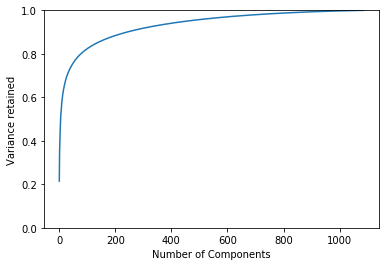

C:\Users\info\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\info\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


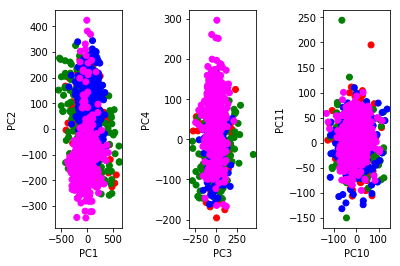

0.775112683986
0.510321450201


<Figure size 432x288 with 0 Axes>

In [0]:
figure = plt.figure()
plt.subplots_adjust(hspace = 0.2, wspace = 0.4)
figure.add_subplot(2, 3, 1)
plt.imshow(np.reshape(x[nImg,:]/255.0,(227,227,3)))
figure.add_subplot(2, 3, 2)
plt.imshow(np.reshape(showImageWithPca(60, x, nImg, False)/255.0,(227,227,3)))
figure.add_subplot(2, 3, 3)
plt.imshow(np.reshape(showImageWithPca(6, x, nImg, False)/255.0,(227,227,3)))
figure.add_subplot(2, 3, 4)
plt.imshow(np.reshape(showImageWithPca(2, x, nImg, False)/255.0,(227,227,3)))
figure.add_subplot(2, 3, 5)
plt.imshow(np.reshape(showImageWithPcaLast(6, x, nImg, False)/255.0,(227,227,3)))
plt.show()

In [0]:
# PCA
naiveBayesClassifier(x,y)
plotClfBoundaries(x,y)